##### This notebook answers:

What patterns exist?

What is our target?

What features matter?

# 01  Exploratory Data Analysis (EDA)

This notebook explores the merged 311 dataset to:

- Understand target distribution
- Analyze temporal patterns
- Explore categorical features
- Identify modeling challenges

Dataset:
data/processed/311_2022_2025_base.csv

## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style("whitegrid")


## 2. Load Processed Data

In [2]:
df = pd.read_csv(
    "../data/processed/311_2022_2025_base.csv",
    parse_dates=["creation_date"]
)

print(df.shape)
df.head()


(1678480, 14)


,creation_date,status,first_3_chars_of_postal_code,intersection_street_1,intersection_street_2,ward,service_request_type,division,section,source_year,year,month,day_of_week,hour
0,2022-01-01 00:12:24,Completed,M1E,NaN,NaN,Scarborough-Rouge Park (25),Fireworks,Municipal Licensing & Standards,Parks Enforcement,2022,2022,1,5,0
1,2022-01-01 00:20:34,Completed,M9N,NaN,NaN,York South-Weston (05),Amplified Sound,Municipal Licensing & Standards,Bylaw Enforcement,2022,2022,1,5,0
2,2022-01-01 00:31:00,Completed,M3J,NaN,NaN,York Centre (06),Amplified Sound,Municipal Licensing & Standards,Bylaw Enforcement,2022,2022,1,5,0
3,2022-01-01 00:31:28,Completed,M3H,NaN,NaN,York Centre (06),Fireworks,Municipal Licensing & Standards,Parks Enforcement,2022,2022,1,5,0
4,2022-01-01 00:37:50,Completed,M9C,NaN,NaN,Etobicoke Centre (02),Fireworks,Municipal Licensing & Standards,Parks Enforcement,2022,2022,1,5,0


## 3. TARGET ANALYSIS

### 3.1 Status Distribution

In [3]:
status_counts = df["status"].value_counts()
status_percent = df["status"].value_counts(normalize=True) * 100

pd.DataFrame({
    "count": status_counts,
    "percent": status_percent
})


,count,percent
status,,
Completed,1321203,78.714253
Cancelled,192835,11.488668
In Progress,62238,3.707998
New,41158,2.452100
Closed,37663,2.243875
Unknown,23383,1.393106


### 3.2 Visualize Target

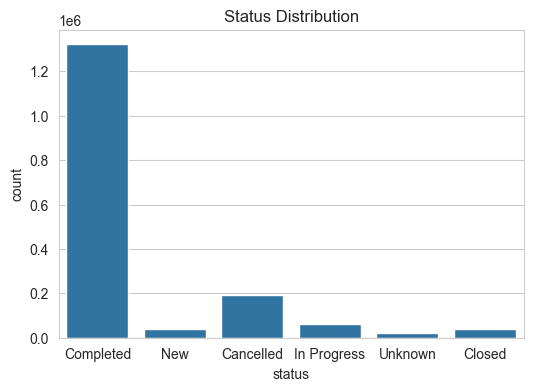

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="status")
plt.title("Status Distribution")
plt.show()


We check:

Is it balanced?

Is cancellation rare?

## 4. TIME PATTERNS

### 4.1 Monthly Trend

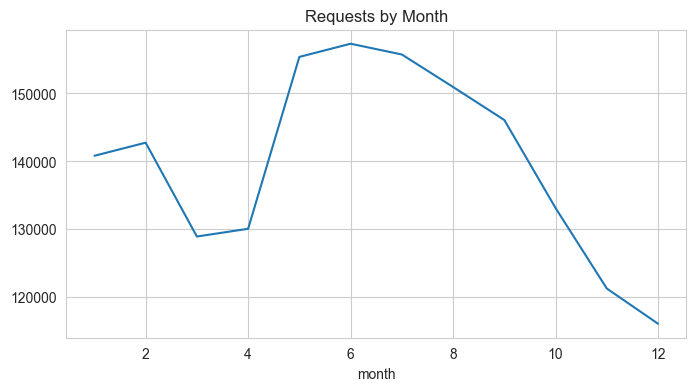

In [5]:
monthly = df.groupby("month")["status"].count()

plt.figure(figsize=(8,4))
monthly.plot()
plt.title("Requests by Month")
plt.show()


### 4.2 Hourly Distribution

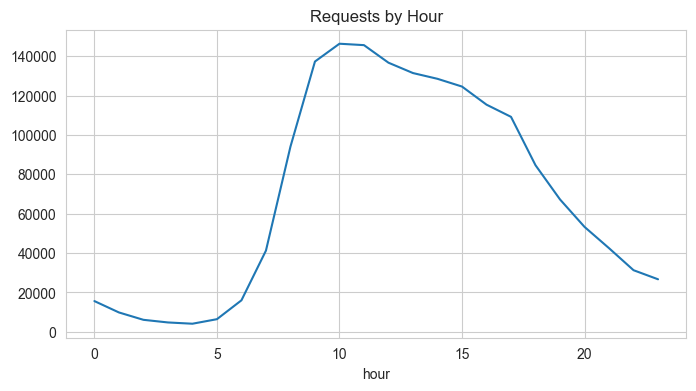

In [6]:
hourly = df.groupby("hour")["status"].count()

plt.figure(figsize=(8,4))
hourly.plot()
plt.title("Requests by Hour")
plt.show()


### 4.3 Hourly Distribution

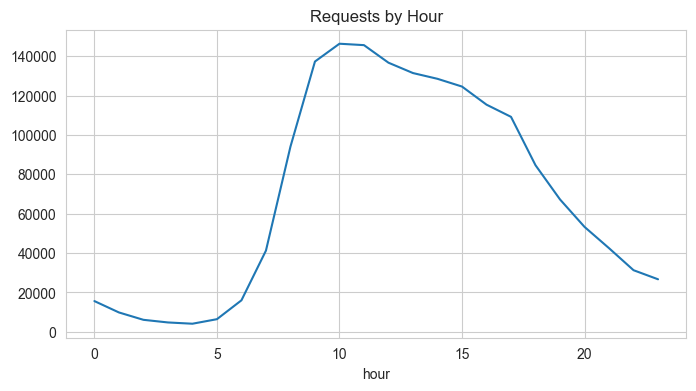

In [7]:
hourly = df.groupby("hour")["status"].count()

plt.figure(figsize=(8,4))
hourly.plot()
plt.title("Requests by Hour")
plt.show()


### 4.4 Cancellation by Hour

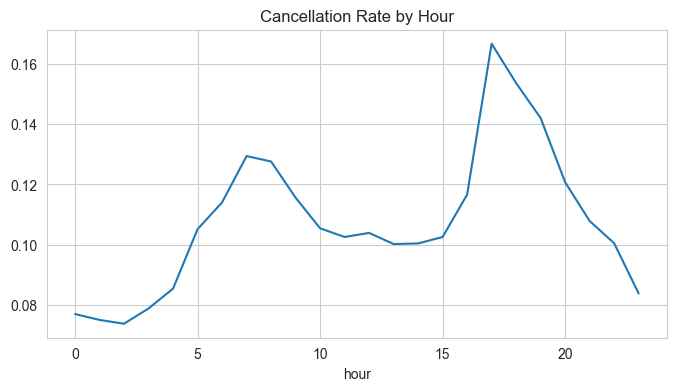

In [8]:
cancel_rate_hour = (
    df.groupby("hour")["status"]
      .apply(lambda x: (x == "Cancelled").mean())
)

plt.figure(figsize=(8,4))
cancel_rate_hour.plot()
plt.title("Cancellation Rate by Hour")
plt.show()


## 5. CATEGORY ANALYSIS

### 5.1 Top Service Request Types

In [9]:
df["service_request_type"].value_counts().head(15)


service_request_type
Injured - Wildlife                                 63770
Residential: Bin: Repair or Replace Lid            56278
Property Standards                                 45186
Cadaver - Wildlife                                 41550
Res / Garbage / Not Picked Up                      34255
Residential Furniture / Not Picked Up              32252
Road - Pot hole                                    31815
Sewer Service Line-Blocked                         29038
Res / Recycle / Not Picked Up                      28968
Res / Organic Green Bin / Not Picked Up            28662
Amplified Sound                                    26108
Residential: Bin: Repair or Replace Body/Handle    25090
Residential Bin Lid Damaged                        24448
Publication Request - Solid Waste                  18319
Road - Cleaning/Debris                             18013
Name: count, dtype: int64

### 5.2 Cancellation Rate by Service Type

In [10]:
cancel_rate_service = (
    df.groupby("service_request_type")["status"]
      .apply(lambda x: (x == "Cancelled").mean())
      .sort_values(ascending=False)
      .head(15)
)

cancel_rate_service


service_request_type
Multi-Res / Nite XMAS Tree / Not Picked Up                      1.000000
Multi-Res / Organic Bin / Damaged                               1.000000
Multi-Res / Recycle Rear-Bin / Not Picked Up                    1.000000
Non-Res Organic Bin / Retrieval                                 1.000000
Non-Res XMAS Tree Nite / Not Picked Up                          1.000000
Residential - Organic Night Collection - Bin Inquiry            1.000000
Investigate - Dangerous Dog with no Dangerous Dog Tag           1.000000
Res / Nite Organic / Bin Inquiry                                1.000000
Unknown - TAS57                                                 0.982609
Multiple SRs/Collections Nights                                 0.846154
Multi-Res / Garbage Rear-Bin / Not Picked Up                    0.833333
Unknown - TAS56                                                 0.798077
Litter Operations Staff - Complaint - Solid Waste Management    0.793814
FEL Multi-Res Yard Waste / Not

This tells you which complaint types get cancelled most.

## 6. High Cardinality Check

In [11]:
df.nunique().sort_values(ascending=False)


creation_date                   1658195
intersection_street_1              7431
intersection_street_2              6663
service_request_type                846
first_3_chars_of_postal_code        101
ward                                 26
hour                                 24
section                              23
month                                12
division                              8
day_of_week                           7
status                                6
source_year                           4
year                                  4
dtype: int64

We check:

Service type unique count?

Ward?

Postal codes?

This helps feature engineering later.